<a href="https://colab.research.google.com/github/carlosmvond/bayes-curso/blob/main/distribucion_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una variable aleatoria $X$ se dice que sigue una distribución normal con media $\mu$ y desviación estándar $\sigma$ si su función de densidad de probabilidad (PDF) está dada por:

$$
f_X(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

donde:

*   $x$ es el valor de la variable aleatoria $X$.
*   $\mu$ es la media de la distribución.
*   $\sigma$ es la desviación estándar de la distribución.

Esta distribución se denota como $ X \sim \mathcal{N}(\mu, \sigma^2) $.


El siguiente código muestra como general numeros aleatorios usando una distribución normal.


[ 0.54338611  1.56074647 -0.15784046  1.73291373  1.23819114  0.34054629
 -1.18037624 -0.9485095  -1.57235214 -0.49942934]


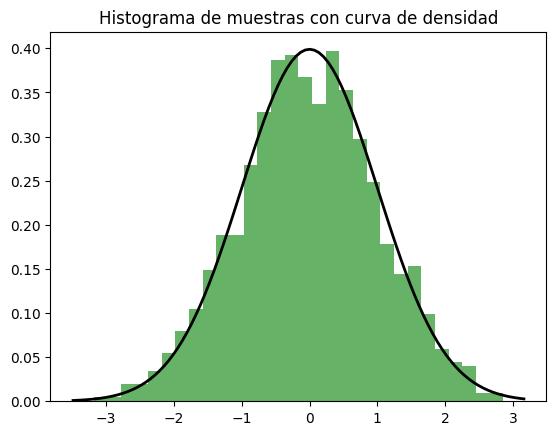

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Especificar los parámetros de la distribución normal
mu = 0      # Media
sigma = 1   # Desviación estándar
n_samples = 1000  # Número de muestras

# Generar las muestras
samples = np.random.normal(mu, sigma, n_samples)

# Imprimir las primeras 10 muestras
print(samples[:10])

# Graficar un histograma de las muestras
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Graficar la función de densidad teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-((x - mu)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
title = "Histograma de muestras con curva de densidad"
plt.title(title)
plt.show()



**Modelo de Monod con efecto aleatorio.**

El modelo de Monod para la tasa específica de crecimiento $\mu$ en función de la concentración del sustrato $S$ está dado por:

$$
\mu = \mu_{\text{max}} \frac{S}{S + K_s}
$$

donde:

- $\mu_{\text{max}}$ es la tasa máxima de crecimiento, y se modela como una variable aleatoria normal:
$$
\mu_{\text{max}} \sim \mathcal{N}(\mu_{\text{max,mean}}, \sigma_{\text{max}}^2)
$$

- $K_s$ es la concentración de sustrato a la cual la tasa de crecimiento es la mitad de $\mu_{\text{max}}$, y se modela como una variable aleatoria normal:
$$
K_s \sim \mathcal{N}(K_{s,\text{mean}}, \sigma_s^2)
$$

donde $\mu_{\text{max,mean}}$ y $K_{s,\text{mean}}$ son las medias de las distribuciones normales de $\mu_{\text{max}}$ y $K_s$, respectivamente, y $\sigma_{\text{max}}^2$ y $\sigma_s^2$ son sus varianzas.


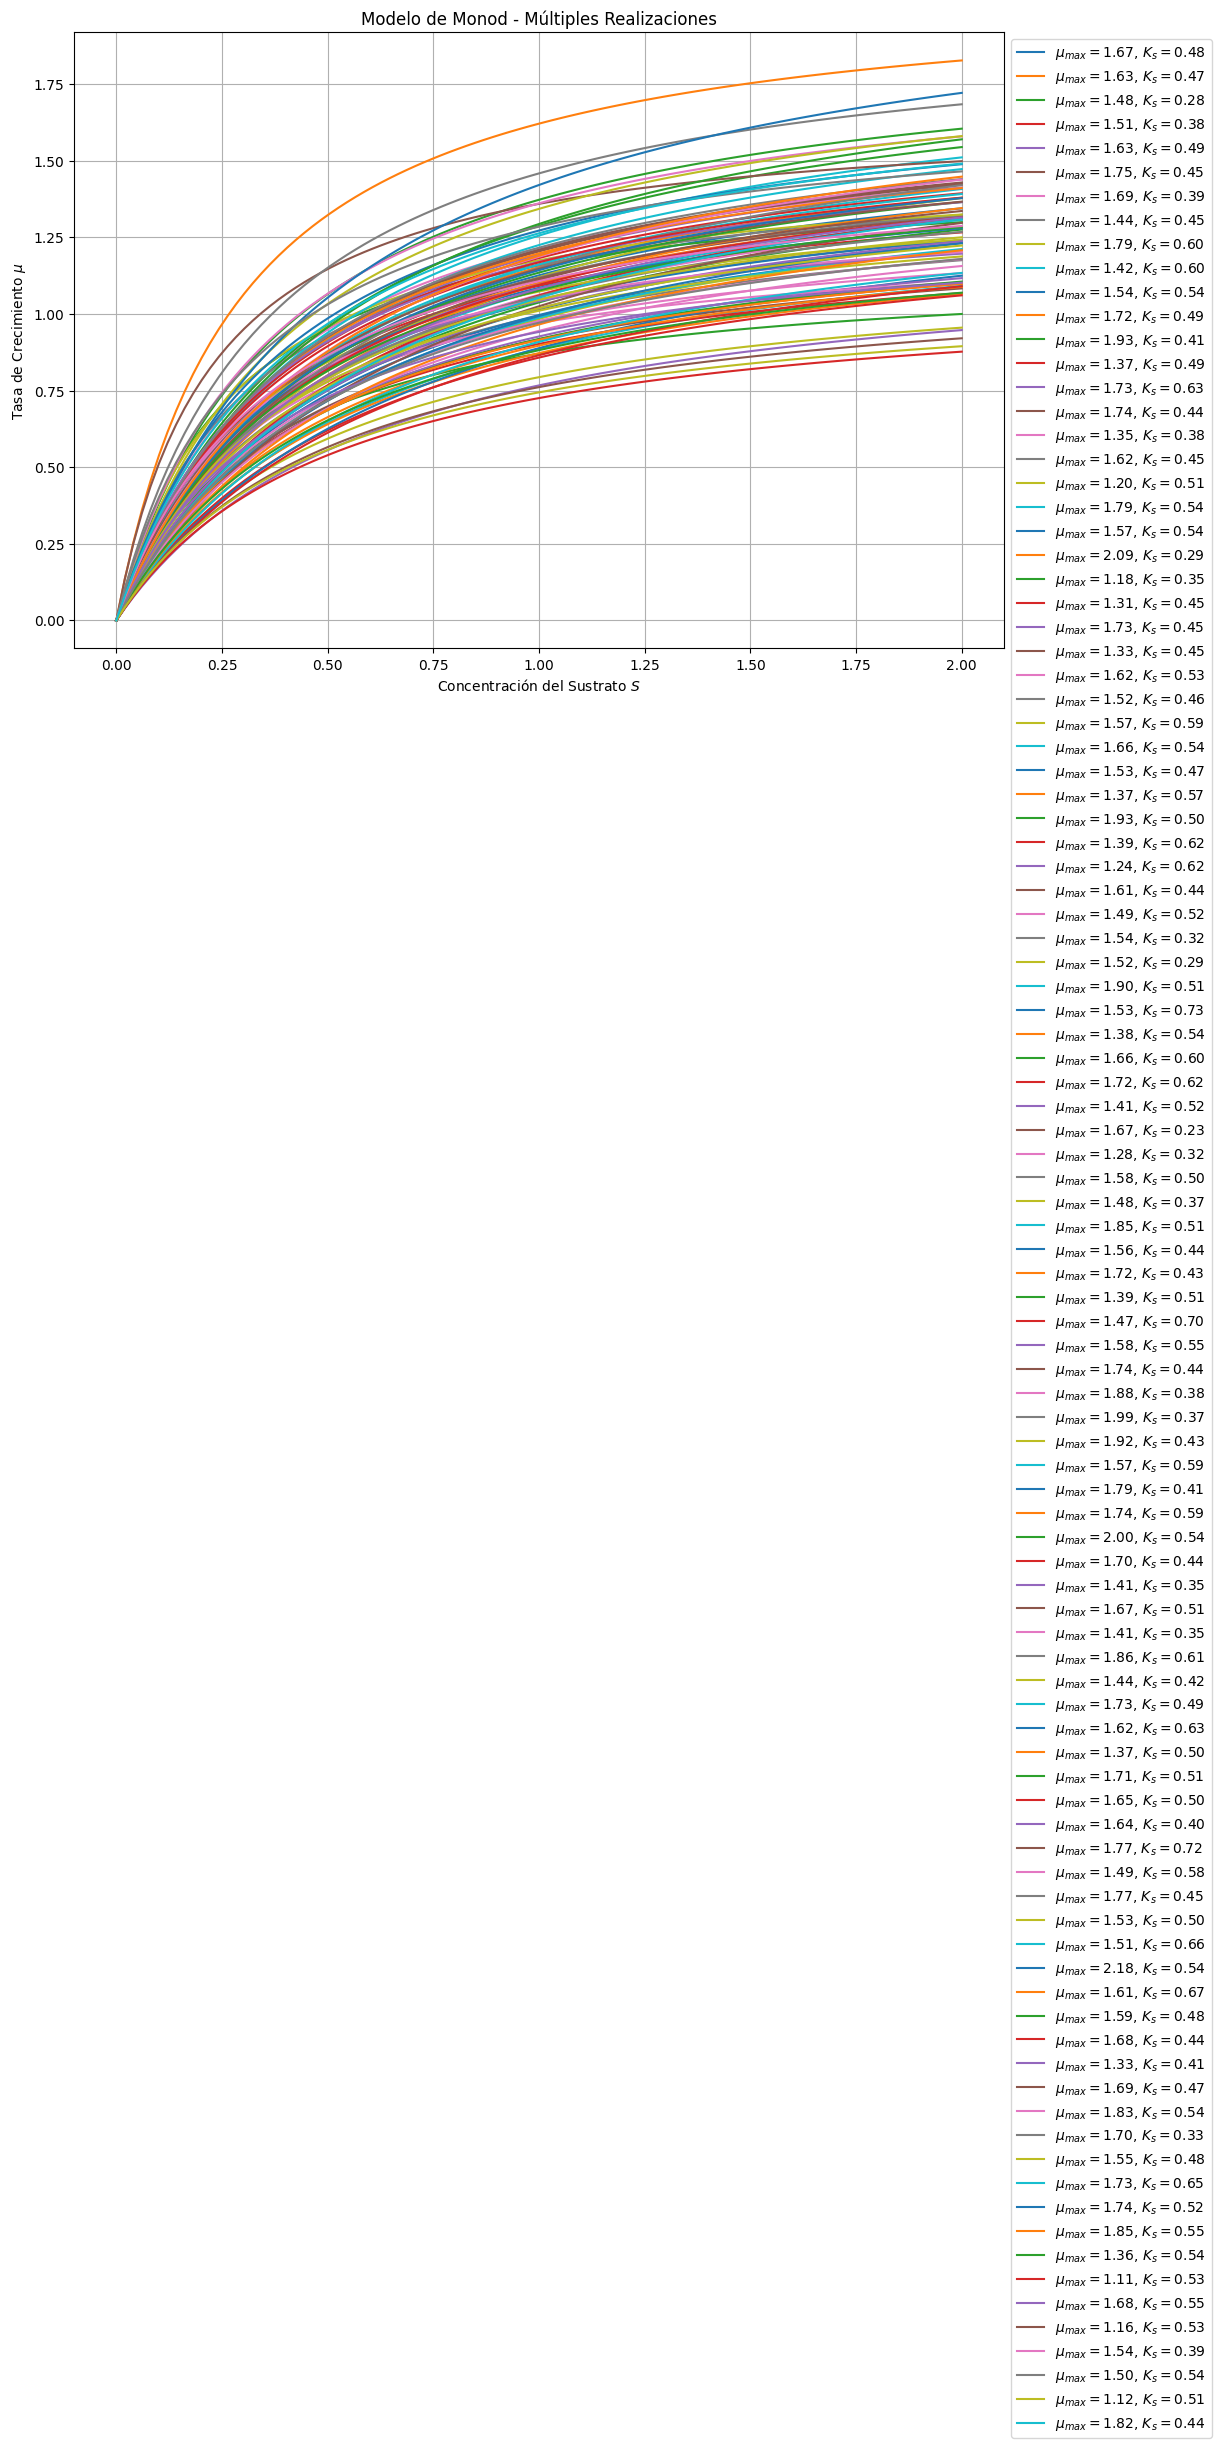

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros de la distribución normal para mu_max y K_s
mu_max_mean = 1.6  # Media de la tasa máxima de crecimiento
sigma_max = 0.2    # Desviación estándar de la tasa máxima de crecimiento
Ks_mean = 0.5      # Media de la concentración de sustrato
sigma_s = 0.1      # Desviación estándar de la concentración de sustrato

# Definir el rango de concentración del sustrato S
S = np.linspace(0, 2, 100)  # Crear un array de concentraciones del sustrato desde 0 hasta 2 con 100 puntos equidistantes

# Configurar el número de realizaciones para graficar
num_realizaciones = 100  # Número de realizaciones a generar y graficar

# Crear la figura para la gráfica
plt.figure(figsize=(12, 8))  # Configurar el tamaño de la figura para la gráfica

# Generar y graficar múltiples realizaciones del modelo de Monod
for _ in range(num_realizaciones):
    # Generar valores aleatorios para mu_max y Ks usando distribuciones normales
    mu_max = np.random.normal(mu_max_mean, sigma_max)  # Valor aleatorio de la tasa máxima de crecimiento
    Ks = np.random.normal(Ks_mean, sigma_s)            # Valor aleatorio de la concentración de sustrato

    # Calcular la tasa de crecimiento usando el modelo de Monod para cada valor de concentración de sustrato
    mu = mu_max * (S / (S + Ks))  # Aplicar el modelo de Monod para obtener la tasa de crecimiento

    # Graficar la realización con una etiqueta que muestra los valores de mu_max y Ks
    plt.plot(S, mu, label=f'$\mu_{{max}} = {mu_max:.2f}$, $K_s = {Ks:.2f}$')

# Configurar las etiquetas y el título de la gráfica
plt.xlabel('Concentración del Sustrato $S$')  # Etiqueta del eje X, indicando la variable de concentración del sustrato
plt.ylabel('Tasa de Crecimiento $\mu$')      # Etiqueta del eje Y, indicando la variable de tasa de crecimiento
plt.title('Modelo de Monod - Múltiples Realizaciones')  # Título de la gráfica que describe el contenido
plt.legend(loc='best', bbox_to_anchor=(1, 1))  # Mostrar la leyenda en la mejor ubicación posible fuera del gráfico
plt.grid(True)  # Mostrar la cuadrícula en la gráfica para facilitar la lectura
plt.show()      # Mostrar la gráfica resultante



## Intervalo de Credibilidad

Un **intervalo de credibilidad** es un intervalo para una variable aleatoria en el que se encuentra un valor con una probabilidad especificada, dado el modelo y los datos observados.

Para una variable aleatoria \( X \) con una distribución de probabilidad dada, el intervalo de credibilidad del nivel de confianza \(1 - \alpha\) se define como:

$$
\left[ L_{\alpha}(X), U_{\alpha}(X) \right]
$$

donde \( L_{\alpha}(X) \) y \( U_{\alpha}(X) \) son los límites inferior y superior del intervalo de credibilidad, tales que:

$$
P\left(L_{\alpha}(X) \leq X \leq U_{\alpha}(X) \mid \text{datos}\right) = 1 - \alpha
$$

Esto significa que, dado el modelo y los datos, la probabilidad de que el valor verdadero de \( X \) se encuentre dentro del intervalo es \( 1 - \alpha \).

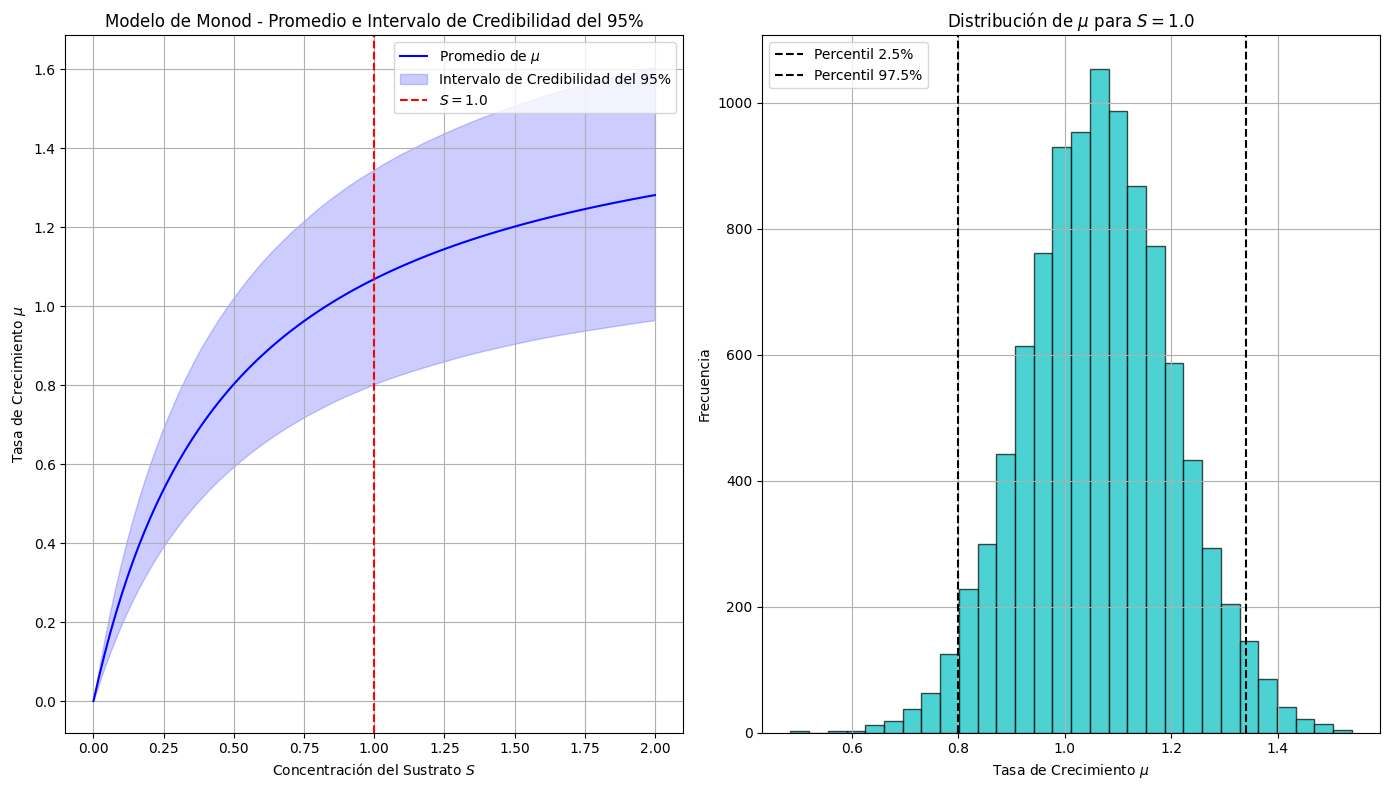

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros de la distribución normal para mu_max y K_s
mu_max_mean = 1.6  # Media de la tasa máxima de crecimiento
sigma_max = 0.2    # Desviación estándar de la tasa máxima de crecimiento
Ks_mean = 0.5      # Media de la concentración de sustrato
sigma_s = 0.05     # Desviación estándar de la concentración de sustrato

# Definir el rango de concentración del sustrato S
S = np.linspace(0, 2, 100)  # Crear un array de concentraciones del sustrato desde 0 hasta 2 con 100 puntos

# Configurar el número de realizaciones para simular
num_realizaciones = 10000  # Número de realizaciones para generar una estimación precisa

# Inicializar un array para almacenar las tasas de crecimiento simuladas
mu_matrix = np.zeros((num_realizaciones, len(S)))  # Crear una matriz para almacenar las tasas de crecimiento

# Generar múltiples realizaciones del modelo de Monod
for i in range(num_realizaciones):
    # Generar valores aleatorios para mu_max y K_s a partir de distribuciones normales
    mu_max = np.random.normal(mu_max_mean, sigma_max)  # Tasa máxima de crecimiento
    Ks = np.random.normal(Ks_mean, sigma_s)            # Concentración de sustrato media

    # Calcular la tasa de crecimiento usando el modelo de Monod para cada valor de S
    mu_matrix[i, :] = mu_max * (S / (S + Ks))  # Aplicar el modelo de Monod y almacenar en la matriz

# Calcular el promedio de la tasa de crecimiento
mu_mean = np.mean(mu_matrix, axis=0)  # Calcular el promedio de las tasas de crecimiento para cada concentración del sustrato

# Calcular el intervalo de credibilidad del 95% usando percentiles
mu_lower = np.percentile(mu_matrix, 2.5, axis=0)  # Límite inferior del intervalo de credibilidad (percentil 2.5%)
mu_upper = np.percentile(mu_matrix, 97.5, axis=0) # Límite superior del intervalo de credibilidad (percentil 97.5%)

# Seleccionar un valor específico de S para analizar
S_especifico = 1.0  # Valor específico de la concentración de sustrato para analizar

# Encontrar el índice en el array S más cercano al valor específico
indice_S_especifico = np.argmin(np.abs(S - S_especifico))

# Extraer las tasas de crecimiento para el valor específico de S
mu_especifico = mu_matrix[:, indice_S_especifico]  # Tasas de crecimiento correspondientes a S_especifico

# Calcular los percentiles del 2.5% y 97.5% para el intervalo de credibilidad en el histograma
percentil_2_5 = np.percentile(mu_especifico, 2.5)
percentil_97_5 = np.percentile(mu_especifico, 97.5)

# Crear la gráfica
plt.figure(figsize=(14, 8))  # Configurar el tamaño de la figura

# Graficar el promedio de la tasa de crecimiento y el intervalo de credibilidad
plt.subplot(1, 2, 1)  # Crear el primer subplot (1 fila, 2 columnas, primer subplot)
plt.plot(S, mu_mean, label='Promedio de $\mu$', color='b')  # Línea del promedio de la tasa de crecimiento
plt.fill_between(S, mu_lower, mu_upper, color='b', alpha=0.2, label='Intervalo de Credibilidad del 95%')  # Rellenar el área entre los percentiles
plt.axvline(S_especifico, color='r', linestyle='--', label=f'$S = {S_especifico:.1f}$')  # Línea vertical para el valor específico de S
plt.xlabel('Concentración del Sustrato $S$')  # Etiqueta del eje X
plt.ylabel('Tasa de Crecimiento $\mu$')      # Etiqueta del eje Y
plt.title('Modelo de Monod - Promedio e Intervalo de Credibilidad del 95%')  # Título de la gráfica
plt.legend(loc='best')  # Mostrar la leyenda en la mejor ubicación
plt.grid(True)          # Mostrar la cuadrícula en la gráfica

# Graficar la distribución de la tasa de crecimiento para el valor específico de S
plt.subplot(1, 2, 2)  # Crear el segundo subplot (1 fila, 2 columnas, segundo subplot)
plt.hist(mu_especifico, bins=30, color='c', edgecolor='black', alpha=0.7)  # Histograma de las tasas de crecimiento para el valor específico
plt.axvline(percentil_2_5, color='k', linestyle='--', label='Percentil 2.5%')  # Línea vertical para el percentil 2.5%
plt.axvline(percentil_97_5, color='k', linestyle='--', label='Percentil 97.5%')  # Línea vertical para el percentil 97.5%
plt.xlabel('Tasa de Crecimiento $\mu$')  # Etiqueta del eje X
plt.ylabel('Frecuencia')                # Etiqueta del eje Y
plt.title(f'Distribución de $\mu$ para $S = {S_especifico:.1f}$')  # Título del histograma
plt.legend(loc='best')  # Mostrar la leyenda en la mejor ubicación
plt.grid(True)          # Mostrar la cuadrícula en el histograma

# Ajustar automáticamente el diseño de los subplots
plt.tight_layout()
plt.show()          # Mostrar la gráfica final

